In [1]:
#conda install -c conda-forge xarray

In [2]:
#conda install -c conda-forge xarray dask netCDF4 bottleneck

In [3]:
import webbrowser
#webbrowser.open('https://github.com/enyfeo/efas/tree/master/work')

In [4]:
import webbrowser
#webbrowser.open('https://1028f8d26f624cd18d39-my.sharepoint.com/:f:/g/personal/yilmazk_metu_edu_tr/Esk2AiVspw5OsePr7toWahgBC1HX7YlK_zVKD8K6NL1TKQ?e=XWbvuh')

In [5]:
# xarray.sel
import webbrowser
#webbrowser.open('https://docs.xarray.dev/en/stable/generated/xarray.DataArray.sel.html')

In [6]:
# Plot show months
import webbrowser
#webbrowser.open('https://stackoverflow.com/questions/67582913/plotting-time-series-in-matplotlib-with-month-names-ex-january-and-showing-ye')

In [7]:
import pandas as pd
import xarray as xr
import numpy as np
from random import sample
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

In [8]:
stations = pd.read_excel('Chosen_all.xlsx', index_col=0)

In [9]:
dfall = pd.DataFrame()
pgs = range(1, 20)
for pg in pgs:
    print('Year Processing: ', str(pg))
    #  Read TimeSeries Data for the current year
    flname =  "Efas_datasets/adaptor_" + str(pg) + ".nc"
    flname = "C:/Users/PC/Desktop/&Python/&Koray Hoca/&Work2/Efas_datasets/adaptor_" + str(pg) + ".nc"
    clim = xr.open_dataset(flname)
    clim
    lat = clim.variables['latitude']
    lon = clim.variables['longitude']
    # convert data to usable ndarray
    lat_ndarray = np.asarray(lat[:])
    lon_ndarray = np.asarray(lon[:])  
    # Iterate over all the stations in stations frame
    dfyear = pd.DataFrame()
    for stnam in stations.stname:
        station=stations[stations['stname'] == stnam] # We have chosen a station for consistency
        station
        # Get grid corrdinates nearest to the selected station
        coordinates = np.unravel_index((np.abs(lat_ndarray - station.north.values) + np.abs(lon_ndarray - station.east.values)).argmin(), lat_ndarray.shape)
        st_y = clim.variables['y'][coordinates[0]]
        st_x = clim.variables['x'][coordinates[1]]
        # Now we will plot a time series of the derived station by using its Lat and Lon, locating the nearest point
        # extract data for selected point in netcdf file by LISFLOOD coordinates
        #dsloc = ds.sel(x=station.LisfloodX.values,y=station.LisfloodY.values,method='nearest')
        climloc = clim.sel(x=st_x,y=st_y,method='nearest')
        # Now that we have a location in the dsloc and climloc variables we can plot the data. Below we will first align the data so that the time fields are in the same format and reference
        # Historical Simulations are based on the 06UTC of the Date in the Time field Forecast fields are based on the timestep from the basetime.

        #base=dsloc.time.values
        #time=np.array([base+np.timedelta64(step) for step in dsloc.step.values])
        # We will now construct a dataframe consisting of the Historical Dataset and Ensemble Members
        df = pd.DataFrame({
        #    'Historical_times': np.array(climloc.time.values + np.timedelta64(climloc.step.values)),
            'Historical_times': np.array(climloc.time.values),
            # Historical Times from the Climatology File
            'Historical': climloc.dis06.values}) #[:, -1, -1]#,  # Historical Data from the Climatology file
        #    'TimeStep': time})  # Time data from the Ensemble Data file as Times (Base + Delta("STEP"))
        df.rename(columns={'Historical': stnam}, inplace=True)

        if stnam == stations.stname[stations.stname.index[0]]:
            dfyear = pd.concat([dfyear, df], axis=1, sort=False)
            print(stnam)
        else:
            df = df.drop(columns=['Historical_times'])
            dfyear = pd.concat([dfyear, df], axis=1, sort=False) 
    dfall = dfall.append(dfyear, ignore_index=True)

Year Processing:  1
D09A011
Year Processing:  2
D09A011
Year Processing:  3
D09A011
Year Processing:  4
D09A011
Year Processing:  5
D09A011
Year Processing:  6
D09A011
Year Processing:  7
D09A011
Year Processing:  8
D09A011
Year Processing:  9
D09A011
Year Processing:  10
D09A011
Year Processing:  11
D09A011
Year Processing:  12
D09A011
Year Processing:  13
D09A011
Year Processing:  14
D09A011
Year Processing:  15
D09A011
Year Processing:  16
D09A011
Year Processing:  17
D09A011
Year Processing:  18
D09A011
Year Processing:  19
D09A011


In [10]:
#for number in dsloc.number.values:  # Include each member into the dataframe
#    df['Ensemble_Member_' + str(number)] = dsloc.dis24[number - 1, :, -1, -1].values

##dfall.head()  # Print a short list of the dataframe
# Now we will plot the members of the Dataframe
dfall.to_excel('Adopter2006-2015.xlsx')

climloc

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Dis06 to Dis24

In [11]:
dfall = pd.read_excel("Adopter2006-2015.xlsx")

In [12]:
dfall.set_index('Historical_times', inplace=True)
#Set index of data as date

In [13]:
# DateOffsets
import webbrowser
#webbrowser.open('https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects')

In [14]:
flw_dis24 =dfall.resample('D').mean()
#Resample the data according to day with mean method

In [15]:
flw_dis24
flw_dis24.to_excel('flw_dis24_2006-2015.xlsx')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Get Agi data of 2009 - 2015 in an excel file

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

%matplotlib inline

In [17]:
place = "C:/Users/PC/Desktop/&Python/&Koray Hoca/&Work2/Agi/Antalya/"

x2006 =pd.read_excel(place +"FlowBook_Antalya_Basin_2006_FlowTimeSeries.xlsx")
x2007 =pd.read_excel(place +"FlowBook_Antalya_Basin_2007_FlowTimeSeries.xlsx")
x2008 =pd.read_excel(place +"FlowBook_Antalya_Basin_2008_FlowTimeSeries.xlsx")
x2009 =pd.read_excel(place +"FlowBook_Antalya_Basin_2009_FlowTimeSeries.xlsx")
x2010 =pd.read_excel(place +"FlowBook_Antalya_Basin_2010_FlowTimeSeries.xlsx")
x2011 =pd.read_excel(place +"FlowBook_Antalya_Basin_2011_FlowTimeSeries.xlsx")
x2012 =pd.read_excel(place +"FlowBook_Antalya_Basin_2012_FlowTimeSeries.xlsx")
x2013 =pd.read_excel(place +"FlowBook_Antalya_Basin_2013_FlowTimeSeries.xlsx")
x2014 =pd.read_excel(place +"FlowBook_Antalya_Basin_2014_FlowTimeSeries.xlsx")
x2015 =pd.read_excel(place +"FlowBook_Antalya_Basin_2015_FlowTimeSeries.xlsx")
# Read needed excel files in folder 

In [18]:
stations = pd.read_excel('Chosen_all.xlsx', index_col=0)
# Take names of needed station from an excel file (I write them)
df_total = pd.DataFrame(columns = stations.stname)
# Create a dataframe with column names from stations file

In [19]:
df_total = pd.concat([df_total, x2006, x2007, x2008, x2009, x2010, x2011, x2012, x2013, x2014, x2015], ignore_index=True, sort=False)
# Concat all excel files in df_total

In [20]:
df_total.set_index("datetime", inplace=True)
# Set index of df_total as datetime (dates)

In [21]:
df_total.to_excel("Agi_2006-2015.xlsx")
#Write all agi data into an excel named as Agi total (NaN values in excel are empty)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Hydrograph

In [22]:
import matplotlib 
%matplotlib inline

In [23]:
hg_efas=flw_dis24
# hg: Hydrograph
hg_agi=df_total

# D09A011

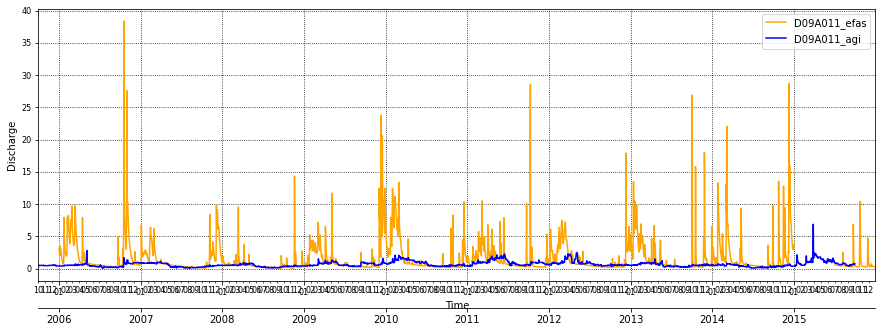

In [24]:
#D09A011
plt=hg_efas.D09A011.plot(kind='line',label='D09A011_efas',color ='orange',figsize=(15,5))
plt.set_ylabel('Discharge')
plt.set_xlabel('Time')
hg_agi.D09A011.plot(kind='line',label='D09A011_agi',color= 'blue')
# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()
plt.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
# '%m' to get months as number
plt.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.xaxis.set_major_locator(fmt_year)
plt.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

# fontsize for month labels
plt.tick_params(labelsize=8, which='both')
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = plt.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.set_xlabel('Time')

##start, end = plt.get_xlim()
##plt.xaxis.set_ticks(np.arange(start, end))
plt.grid(zorder=0,linestyle='dotted', color='black')
#Zorder for line drawings
plt.legend()
##plt.get_figure().savefig(f"plt/D09A011.png",bbox_inches='tight')
# Blue for agi, orange for efas data

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Loop for Graphs

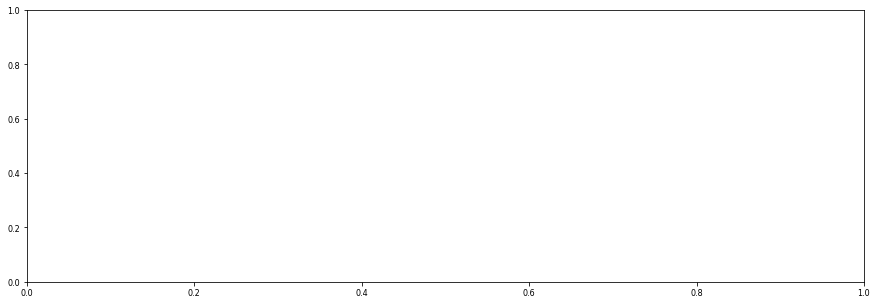

In [25]:
#Graph with months
for i in range(len(stations.stname)):
    plt=hg_efas[stations.stname.iloc[i]].plot(kind='line',label=f'{stations.stname.iloc[i]}_efas',color ='orange',figsize=(15,5))
    plt.set_ylabel('Discharge')
    plt.set_xlabel('Time')
    hg_agi[stations.stname.iloc[i]].plot(kind='line',label=f'{stations.stname.iloc[i]}_agi',color= 'blue')
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    # Minor ticks every year.
    fmt_year = mdates.YearLocator()
    plt.xaxis.set_minor_locator(fmt_month)
    # '%b' to get the names of the month
    # '%m' to get months as number
    plt.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    plt.xaxis.set_major_locator(fmt_year)
    plt.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

    # fontsize for month labels
    plt.tick_params(labelsize=8, which='both')
    # create a second x-axis beneath the first x-axis to show the year in YYYY format
    sec_xaxis = plt.secondary_xaxis(-0.1)
    sec_xaxis.xaxis.set_major_locator(fmt_year)
    sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.set_xlabel('Time')

    ##start, end = plt.get_xlim()
    ##plt.xaxis.set_ticks(np.arange(start, end))
    plt.grid(zorder=0,linestyle='dotted', color='black')
    plt.legend()
    plt.get_figure().savefig(f"plt2/{stations.stname.iloc[i]}.png",bbox_inches='tight')
    plt.cla()
    # Blue for agi, orange for efas data

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Selecting chosen data from agi and efas_dis24 datas

In [26]:
agi=pd.read_excel("Agi_2006-2015.xlsx")
dis24=pd.read_excel('flw_dis24_2006-2015.xlsx')
chosen=pd.read_excel("chosen_ky.xlsx")
#Upload agi efas_dis24 and chosen station datas as dataframe

In [27]:
dis24.columns.values
#Checking column values

array(['Historical_times', 'Unnamed: 0', 'D09A011', 'D09A031', 'D09A034',
       'D09A039', 'D09A042', 'D09A060', 'D09A065', 'D09A067', 'D09A068',
       'D09A084', 'D09A086', 'D09A088', 'D09A089', 'D09A095', 'D09A100',
       'D09A101', 'D09A104', 'D09A114', 'D09A122', 'D09A123', 'D09A124',
       'D09A126', 'D09A127', 'D09A131', 'D09A132', 'D09A133', 'D09A134',
       'E09A002', 'E09A012', 'E09A017', 'E09A020', 'E09A021', 'E09A022',
       'E09A024', 'E09A032', 'E09A033', 'E09A099'], dtype=object)

In [28]:
agi.columns.values

array(['datetime', 'D09A011', 'D09A031', 'D09A034', 'D09A039', 'D09A042',
       'D09A060', 'D09A065', 'D09A067', 'D09A068', 'D09A084', 'D09A086',
       'D09A088', 'D09A089', 'D09A095', 'D09A100', 'D09A101', 'D09A104',
       'D09A114', 'D09A122', 'D09A123', 'D09A124', 'D09A126', 'D09A127',
       'D09A131', 'D09A132', 'D09A133', 'D09A134', 'E09A002', 'E09A012',
       'E09A017', 'E09A020', 'E09A021', 'E09A022', 'E09A024', 'E09A032',
       'E09A033', 'E09A099', 'data', 'D09A002', 'D09A006', 'D09A013',
       'D09A016', 'D09A056', 'D09A057', 'D09A075', 'D09A091', 'D09A111',
       'D09A116', 'D09A117', 'D09A118', 'D09A120', 'D09A121', 'D09A125',
       'D09A098', 'D09A135', 'E09A018', 'E09A029', 'E09A030', 'E09A031'],
      dtype=object)

In [29]:
chosen.stname.values
# Taking only chosen stations

array(['D09A034', 'D09A065', 'D09A067', 'D09A068', 'D09A086', 'D09A089',
       'D09A095', 'D09A101', 'D09A122', 'E09A002', 'E09A012', 'E09A017',
       'E09A021', 'E09A022', 'E09A024', 'E09A099'], dtype=object)

In [30]:
lis=list(chosen.stname.values)
# Write chosen stations as list

In [31]:
lis.append('datetime')
# datetime not in the list so we append it

In [32]:
dis24.rename(columns = {'Historical_times':'datetime'}, inplace= True)
# Efas_24 and agi excel sheets have different names for datetime so we change it

In [33]:
lis
# Checking lis values, looking for station name correctness and datetime value

['D09A034',
 'D09A065',
 'D09A067',
 'D09A068',
 'D09A086',
 'D09A089',
 'D09A095',
 'D09A101',
 'D09A122',
 'E09A002',
 'E09A012',
 'E09A017',
 'E09A021',
 'E09A022',
 'E09A024',
 'E09A099',
 'datetime']

In [34]:
dis24_c = dis24[lis]
# dis_c for dis24_chosen

In [35]:
dis24_c.set_index('datetime',inplace=True)
#set index as datetime

In [36]:
agi_c = agi[lis]

In [37]:
agi_c.set_index('datetime',inplace=True)

In [38]:
agi_c.to_excel('Agi_ky_2006-2015.xlsx')

In [39]:
dis24_c.to_excel('Dis24_ky_2006-2015.xlsx')